In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
from dataclasses import dataclass

In [2]:
# Collect data
freqs = [50, 100, 500, 1000]
node_cnts = [5, 10, 15, 20]
int_arrs = [[None for _ in node_cnts] for _ in freqs]
for (i, f) in enumerate(freqs):
  for (j, c) in enumerate(node_cnts):
    file_name = f'./logs/local/test-{c}n-{f}ms.csv'
    data = pd.read_csv(file_name)
    int_arrs[i][j] = data['delay'].to_numpy()

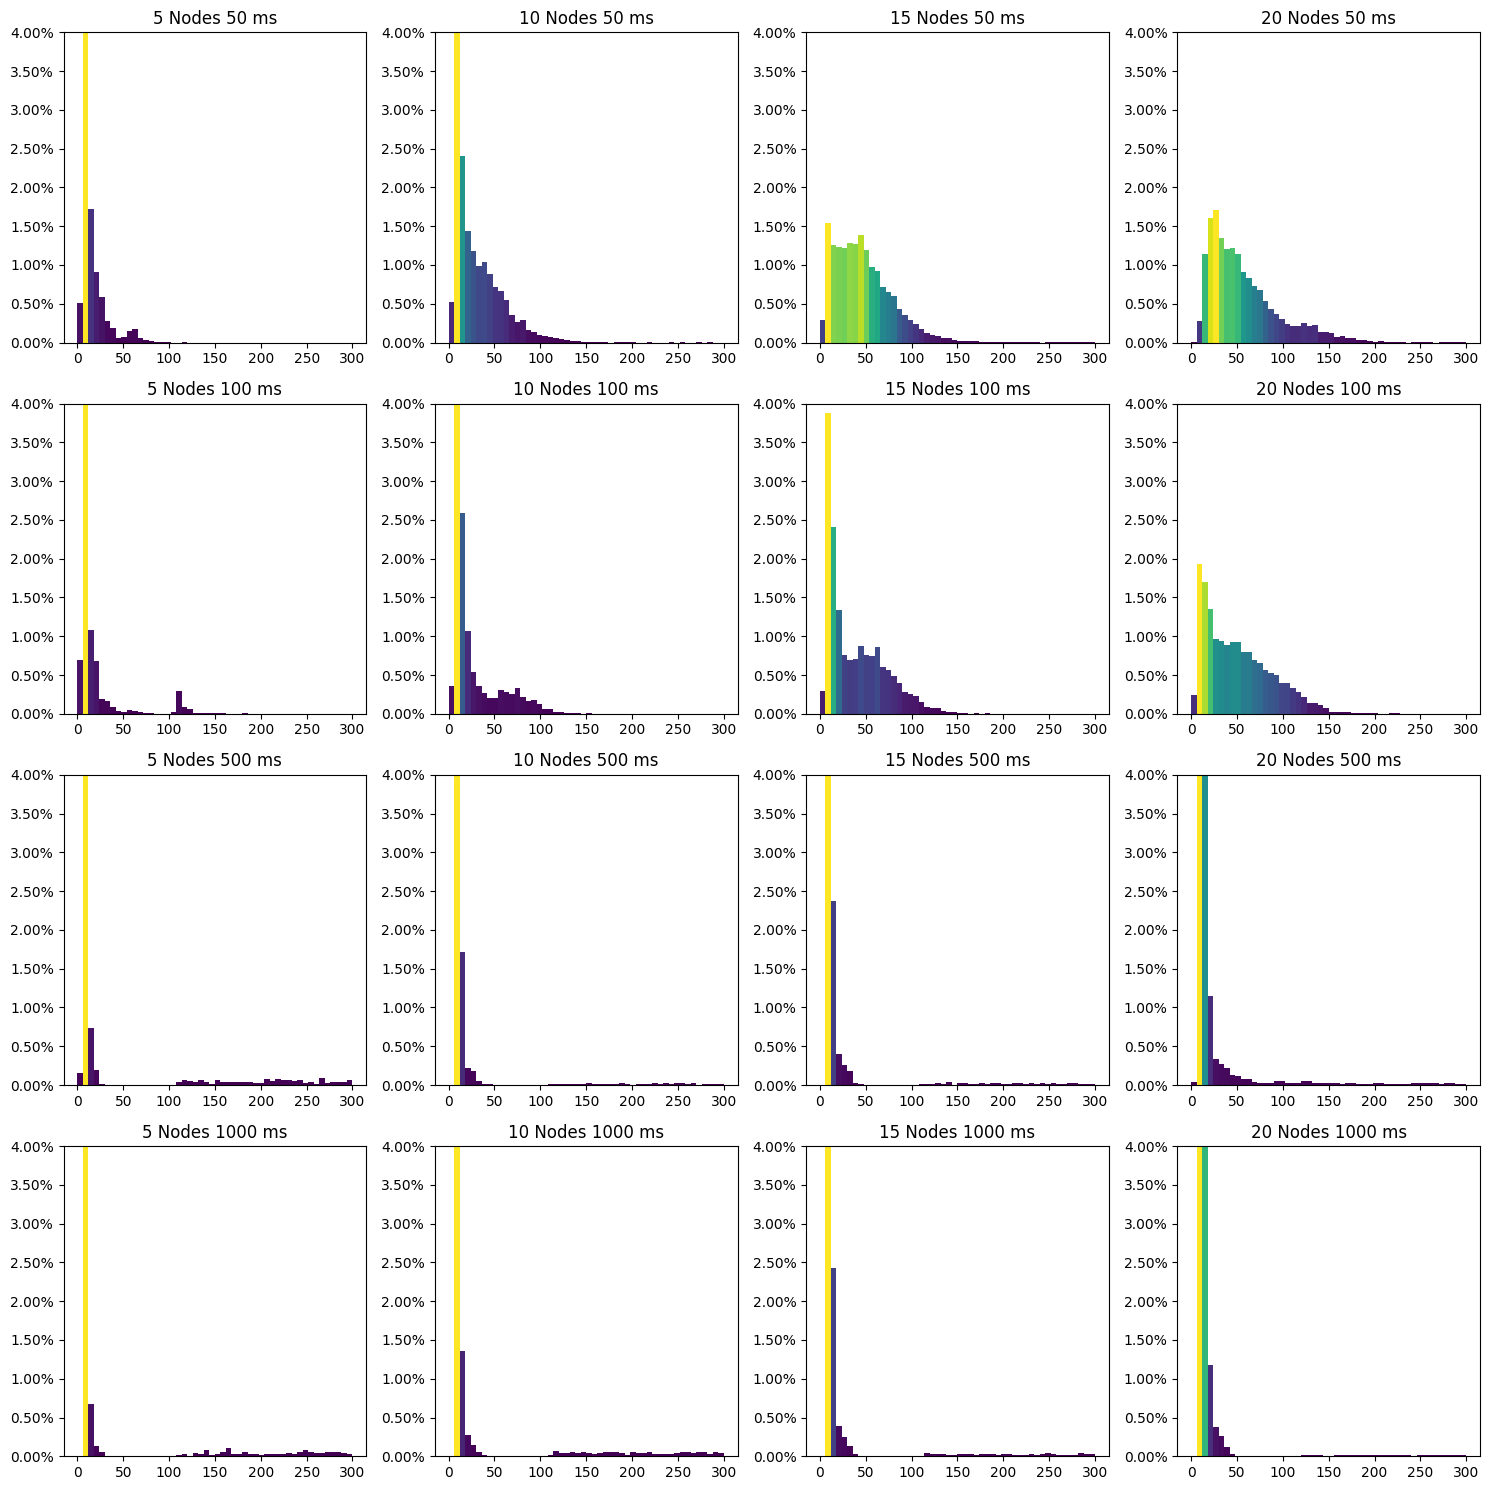

In [3]:

# Draw distribution figures
fig, axs = plt.subplots(len(freqs), len(node_cnts), tight_layout=True, figsize=(15, 15))
for (i, arr_per_freq) in enumerate(int_arrs):
  for (j, delays) in enumerate(arr_per_freq):
    ax = axs[i, j]
    ax.set_ylim(0, 0.04)
    N, bins, patches = ax.hist(delays, bins=50, range=(0, 300), density=True)
    ax.yaxis.set_major_formatter(PercentFormatter(xmax=1))
    ax.set_title(f'{node_cnts[j]} Nodes {freqs[i]} ms')
    fracs = N / N.max()
    norm = colors.Normalize(fracs.min(), fracs.max())
    for thisfrac, thispatch in zip(fracs, patches):
        color = plt.cm.viridis(norm(thisfrac))
        thispatch.set_facecolor(color)

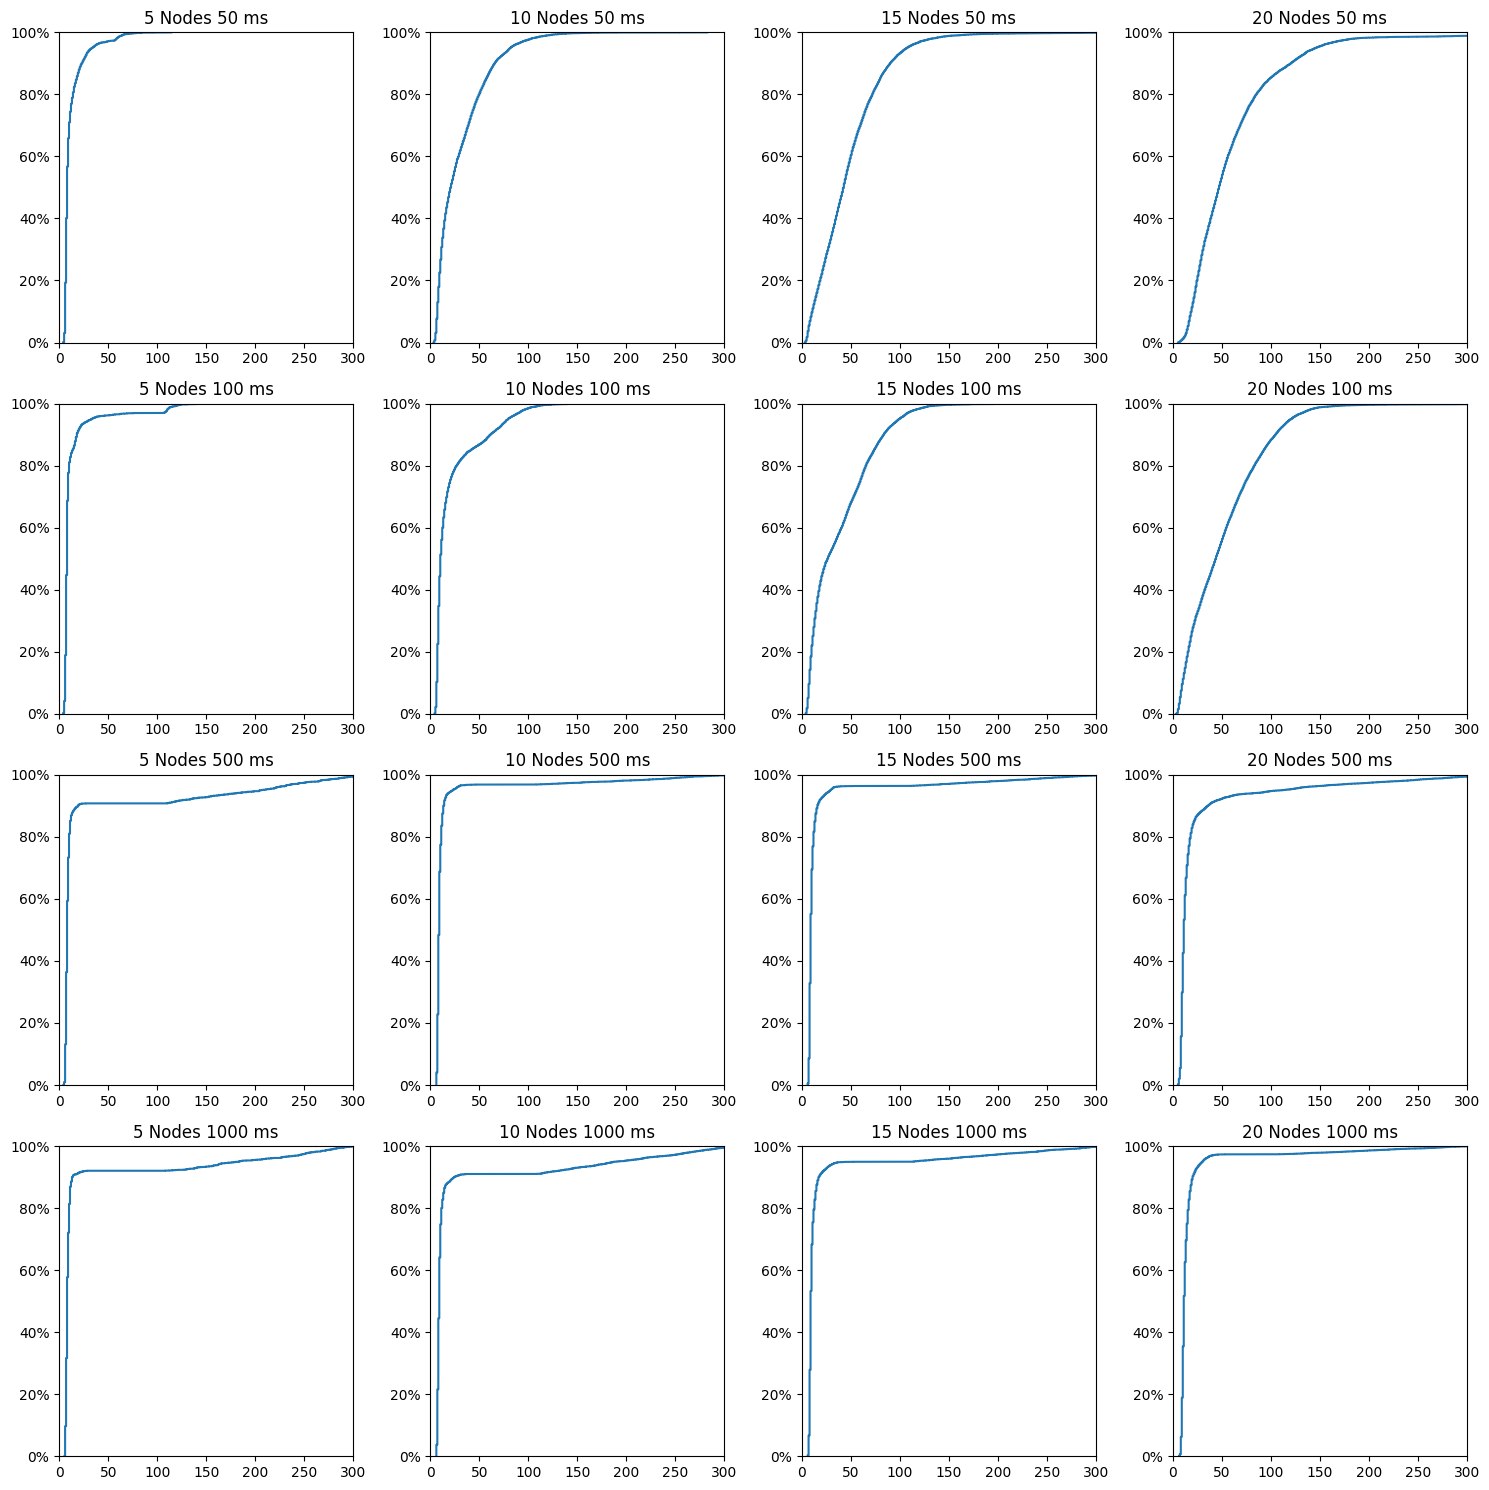

In [4]:
# Draw CDF
fig, axs = plt.subplots(len(freqs), len(node_cnts), tight_layout=True, figsize=(15, 15))
for (i, arr_per_freq) in enumerate(int_arrs):
  for (j, delays) in enumerate(arr_per_freq):
    ax = axs[i, j]
    ax.set_ylim(0, 1)
    ax.set_xlim(0, 300)
    ax.ecdf(delays)
    ax.yaxis.set_major_formatter(PercentFormatter(xmax=1))
    ax.set_title(f'{node_cnts[j]} Nodes {freqs[i]} ms')

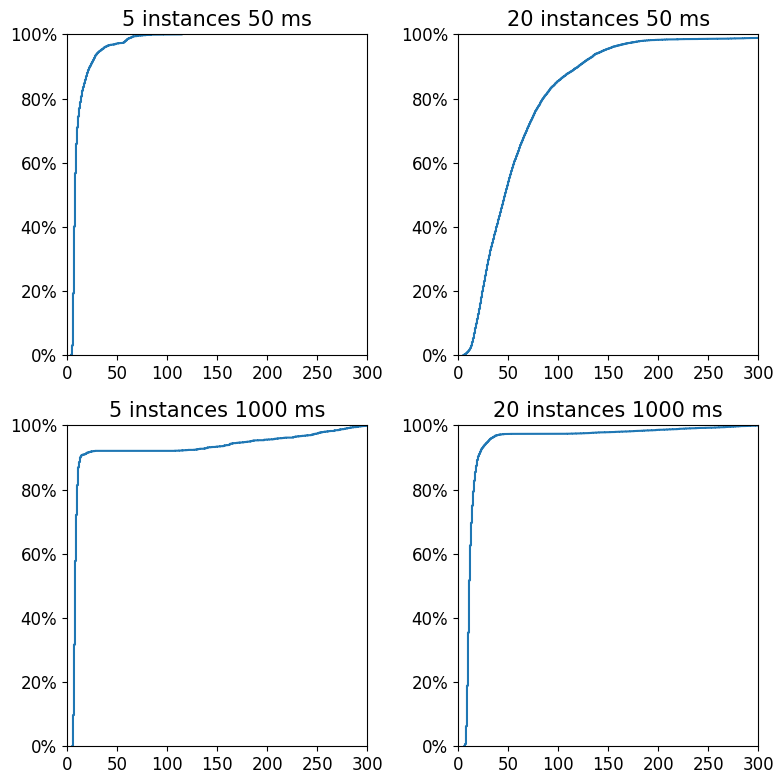

In [5]:
# CDF To save
plt.rcParams.update({'font.size': 12})
fig, axs = plt.subplots(2, 2, tight_layout=True, figsize=(8, 8))
for i in range(2):
  for j in range(2):
    ax = axs[i, j]
    ax.set_ylim(0, 1)
    ax.set_xlim(0, 300)
    ax.ecdf(int_arrs[[0, 3][i]][[0, 3][j]])
    ax.yaxis.set_major_formatter(PercentFormatter(xmax=1))
    ax.set_title(f'{node_cnts[[0, 3][j]]} instances {freqs[[0, 3][i]]} ms', fontsize=15)

fig.savefig('figures/local/dist.pdf', format='pdf', bbox_inches='tight')

In [6]:
def kick_outliners(data):
  mu = np.mean(data)
  sigma = np.std(data)
  return np.array([x for x in data if (mu - 3 * sigma < x < mu + 3 * sigma)], dtype=int)


filtered_data = [[kick_outliners(y) for y in x] for x in int_arrs]


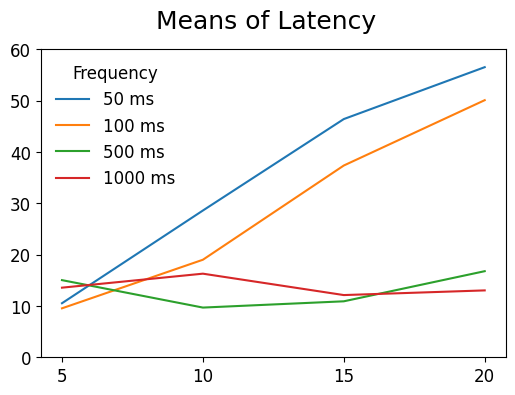

In [7]:

means = [[np.mean(y) for y in x] for x in filtered_data]
# np.array(means)

fig, ax = plt.subplots(1, figsize=(6, 4))
fig.suptitle('Means of Latency', fontsize=18)
for i, m in enumerate(means):
  ax.plot(node_cnts, m, label=f'{freqs[i]} ms')

# Add a legend, and position it on the lower right (with no box)
plt.legend(loc="upper left", title="Frequency", frameon=False)
ax.set_ylim([0, 60])
ax.set_xticks([5, 10, 15, 20])
plt.show()

fig.savefig('figures/local/means.pdf', format='pdf', bbox_inches='tight')

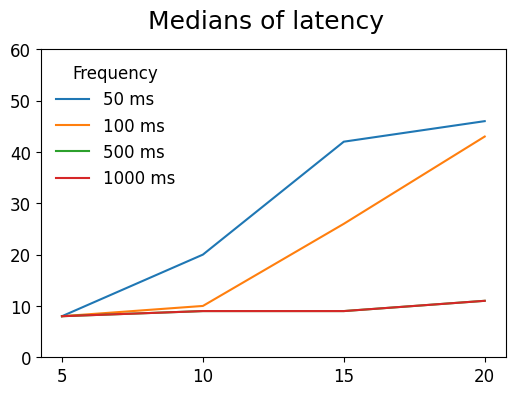

In [8]:
medians = [[np.median(y) for y in x] for x in filtered_data]
# np.array(medians)

fig, ax = plt.subplots(1, figsize=(6, 4))
fig.suptitle('Medians of latency', fontsize=18)
for i, m in enumerate(medians):
  ax.plot(node_cnts, m, label=f'{freqs[i]} ms')

# Add a legend, and position it on the lower right (with no box)
plt.legend(loc="upper left", title="Frequency", frameon=False)
ax.set_ylim([0, 60])
ax.set_xticks([5, 10, 15, 20])
plt.show()

fig.savefig('figures/local/medians.pdf', format='pdf', bbox_inches='tight')